<a href="https://colab.research.google.com/github/hbeck118/GIS/blob/main/ps0final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data I chose for this problem set is a map of New Jersery Transit lines, as public transportation is an area that I want to focus on in my research. I specifically want to focus on the social and political aspects of public transportation, answering questions such as: Who uses public transportation? Who has the greatest need for it? Are those needs met? What does the population look like in areas where public transportation is easily accesssible? What about the areas where it is not accessible at all? I am also interested in exploring the importance of public transportation for people who migrated to the US, if possible specifically undocumented people. I think New Jersey is a great location to study in regards to public transportation, as it has both areas that are very well connected to public transport lines, and areas that are not. I am hoping to be able to draw some conlcusions about the social and political importance of public transportation in the US and the potential of public transportation to contribute to a more equitable society.

[1-4] To start out, I copied the first 4 sections of code from AOK's map.ipynb code
[5+6] Then I used the example from the same code and adjusted it to upload data from all New Jersey Transit lines and make a map of them
[7+8]Realizing that the map looked weird without the outline of New Jersey, I copied the code from the example in map.ipynb, creating a map of NJ county outlines
[9]To overlay the two maps, I adapted some of the code from step 13 of the map.ipynb code. Because at first the NJ-Transit map was much smaller than the NJ-Counties map, I had to add some code to make them the same size. The two frist lines of code in this section are adapted from a suggestion from chatGPT about making the two maps the same size.


In [ ]:
!pip install geopandas==1.0.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 35.1 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.14.4
    Uninstalling geopandas-0.14.4:
      Successfully uninstalled geopandas-0.14.4


In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
#!python --version
gpd.__version__

'1.0.1'

In [ ]:
!pip install mapclassify
import mapclassify #need for thematic map classification

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.1 MB/s eta 0:00:00


In [ ]:
#Map of all NJ transit lines, found here: https://catalog.dvrpc.org/dataset/nj-transit-transit-routes
#Using AOK's code to produce a map of NJ Transit lines
! wget -q -O nj-transit.zip https://docs.google.com/uc?id=175h0d2RdsZQKC0NCTSuWZ5Su_vHiiHMh&export=download

zip_ref = zipfile.ZipFile('nj-transit.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njT0=gpd.read_file('NJ_Transit_Transit_Routes.shp') #load the shapefile with gpd as njC

<Axes: >

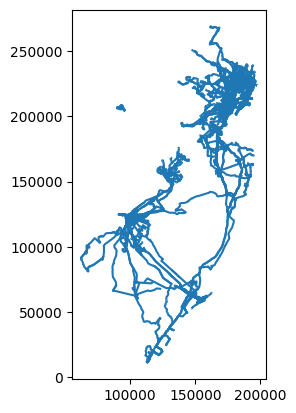

In [ ]:
#make the map
njT0.plot()

In [ ]:
#Trying to combine this map with a map of New Jersey provided in the example from the class
! wget -q -O nj_counties.zip https://docs.google.com/uc?id=1yCnSMGpZsNSjuCkLAq2JAwQLlL9MVrNB&export=download

zip_ref = zipfile.ZipFile('nj_counties.zip', 'r'); zip_ref.extractall(); zip_ref.close()
njC0=gpd.read_file('nj_counties.shp')

<Axes: >

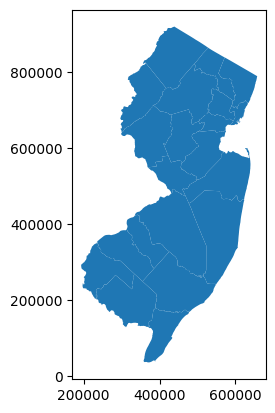

In [ ]:
njC0.plot()

<Axes: >

<Axes: >

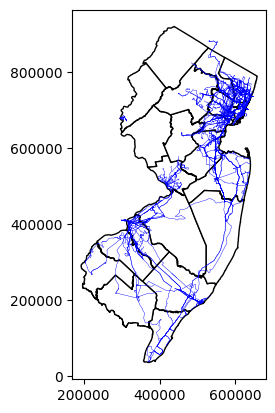

In [ ]:
#To add the New Jersey county lines, I'm trying to overlay the data from the class example (nj_counties) with the data of nj_transit lines I found
#line 1 and two adapted from chatGPT suggestion on how to make two maps I am overlaying the same size
if njC0.crs != njT0.crs:
    njT0 = njT0.to_crs(njC0.crs)
#I used a version of the code shown in step 13 of the map.ipynb code by AOK to overlay two maps
fig, ax = plt.subplots()
njC0.plot(ax=ax, color='white', edgecolor='black',linewidth=1)
njT0.plot(ax=ax, color='blue', linewidth=0.3)

By overlaying the map of New Jersey Transit lines with the map of New Jersey, we can see very clearly that there are parts of New Jersey that are much better connected by public transportation than others. The area that clearly is connected best is the northeast of the state. There is another cluster of NJ-Transit lines in the southwest, although much smaller. This map also demonstrates that there are several parts of the state that are not connected to NJ-Transit at all, especially in the midde and in the northwest. However, this map does not show public transport provided by any other public transportation companies, so no clear conclusions about how well these areas are connected can be drawn yet. The map is also lacking an indication of how densly these areas are populated, which might be helpful to draw conclusions about the importance of public transportation in those areas. To be able to explore some of the questions I suggest above, it might be interesting to overlay this map with data showing the per capita income in those areas, the percentage of foreign born people, and the numbers of how many people use public transportation.

